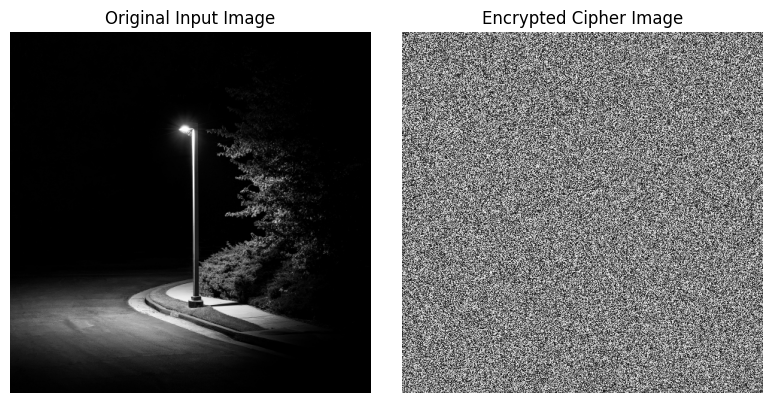

In [ ]:

import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt

# Load your own input image (replace 'your_image.jpg' with your file path)
input_image = Image.open('/content/Sample_image_signal.jpg')

# Convert the input image to grayscale
input_image = input_image.convert('L')

# Convert the grayscale image to a NumPy array
input_image = np.array(input_image)

# Normalize the input image to the range (0, 1)
input_image = input_image / 255.0

# Define the size of the image (M and N)
M, N = input_image.shape

# Step 2: Convert the Image into a 1-D Vector
input_vector = input_image.flatten()  # Normalize to the range (0, 1)

# Step 3: Split the Image into Two Vectors (P1 and P2)
half_length = M * N // 2
P1 = input_vector[:half_length]
P2 = input_vector[half_length:]

# Set parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Define the Lorenz system equations
def lorenz_system(t, xyz):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Runge-Kutta method implementation
def runge_kutta(f, t0, tf, y0, h):
    t_values = [t0]
    y_values = [y0]
    t = t0

    while t < tf:
        k1 = np.array(f(t, y_values[-1]))
        k2 = np.array(f(t + h/2, y_values[-1] + h/2 * k1))
        k3 = np.array(f(t + h/2, y_values[-1] + h/2 * k2))
        k4 = np.array(f(t + h, y_values[-1] + h * k3))

        y_next = y_values[-1] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

        t += h
        t_values.append(t)
        y_values.append(y_next)

    return t_values, y_values

# Define the initial conditions and time span
initial_conditions = [1.0, 0.0, 0.0]
t0 = 0.0
tf = 1200.0
h = 0.01

# Solve the Lorenz system using the Runge-Kutta method
t_values, y_values = runge_kutta(lorenz_system, t0, tf, initial_conditions, h)

# Extract the 'x' and 'y' variables
x_values = [y[0] for y in y_values]
y_values = [y[1] for y in y_values]

# Define Chaotic sequences
chaotic_sequence1 = x_values[:len(P1)]
chaotic_sequence2 = y_values[:len(P2)]

# Normalize chaotic sequences to (0, 1)
chaotic_sequence1 = np.array(chaotic_sequence1)
chaotic_sequence2 = np.array(chaotic_sequence2)
chaotic_sequence1 = (chaotic_sequence1 - chaotic_sequence1.min()) / (chaotic_sequence1.max() - chaotic_sequence1.min())
chaotic_sequence2 = (chaotic_sequence2 - chaotic_sequence2.min()) / (chaotic_sequence2.max() - chaotic_sequence2.min())


# Step 5: Scramble P1 and P2 with Chaotic Sequences
P1 = P1[np.argsort(chaotic_sequence1)]
P2 = P2[np.argsort(chaotic_sequence2)]

# Steps 6-8: Combine, Permute, and Adjust Pixel Values
combined_vector = np.concatenate((P1, P2))

# Generate the secret_key with the same size as combined_vector
secret_key = np.random.randint(0, 256, size=len(combined_vector), dtype=np.uint8)

# Convert combined_vector to uint8
adjusted_vector_uint8 = (combined_vector * 255).astype(np.uint8)

# Perform bitwise XOR
diffused_vector = np.bitwise_xor(adjusted_vector_uint8, secret_key)

# Step 9: Reconstruct the Cipher Image
cipher_image = diffused_vector.reshape((M, N))

# Step 10: Save the Cipher Image (For demonstration, saving as a PNG)
cipher_image = (cipher_image).astype(np.uint8)

Image.fromarray(cipher_image).save("cipher_image.png")

# Load the original input image for display
input_image = Image.fromarray(input_image)
input_image = Image.open('/content/Sample_image_signal.jpg')
# Display the original input image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Input Image')
plt.axis('off')

# Display the encrypted cipher image
plt.subplot(1, 2, 2)
plt.imshow(cipher_image, cmap='gray')
plt.title('Encrypted Cipher Image')
plt.axis('off')

plt.tight_layout()
plt.show()

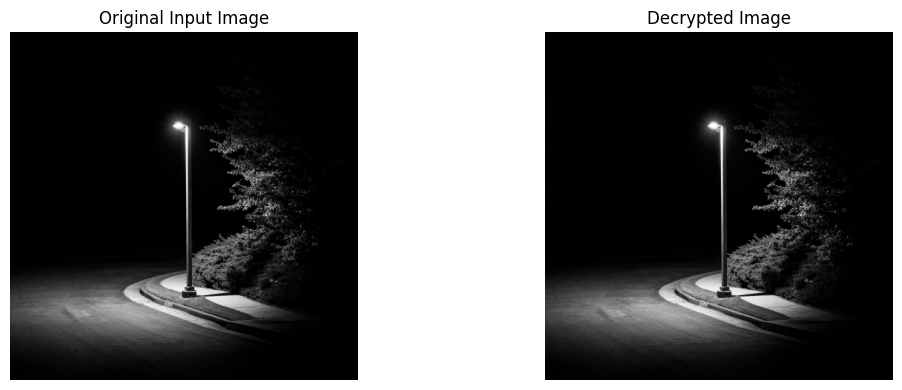

In [ ]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt

# Load the cipher image (replace 'cipher_image.png' with your file path)
cipher_image = Image.open('/content/cipher_image.png')

# Convert the cipher image to a NumPy array
cipher_image = np.array(cipher_image)

# Step 1: Normalize the cipher image to the range (0, 1)
cipher_image = cipher_image / 255.0

# Step 2: Convert the Cipher Image into a 1-D Vector
cipher_vector = cipher_image.flatten()

# Step 3: Retrieve the secret_key (Same as during encryption)

# Step 4: Perform bitwise XOR with secret_key to recover combined_vector
combined_vector_2 = np.bitwise_xor((cipher_vector*255).astype(np.uint8), secret_key)

combined_vector_2 = (combined_vector_2 / 255.0)

# Step 5: Split the Cipher Image into Two Vectors (P1 and P2)
half_length = M * N // 2
P1 = combined_vector_2[:half_length]
P2 = combined_vector_2[half_length:]

# Set parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Define the Lorenz system equations
def lorenz_system(t, xyz):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Runge-Kutta method implementation
def runge_kutta(f, t0, tf, y0, h):
    t_values = [t0]
    y_values = [y0]
    t = t0

    while t < tf:
        k1 = np.array(f(t, y_values[-1]))
        k2 = np.array(f(t + h/2, y_values[-1] + h/2 * k1))
        k3 = np.array(f(t + h/2, y_values[-1] + h/2 * k2))
        k4 = np.array(f(t + h, y_values[-1] + h * k3))

        y_next = y_values[-1] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

        t += h
        t_values.append(t)
        y_values.append(y_next)

    return t_values, y_values

# Define the initial conditions and time span
initial_conditions = [1.0, 0.0, 0.0]
t0 = 0.0
tf = 1200.0
h = 0.01

# Solve the Lorenz system using the Runge-Kutta method
t_values, y_values = runge_kutta(lorenz_system, t0, tf, initial_conditions, h)

# Extract the 'x' and 'y' variables
x_values = [y[0] for y in y_values]
y_values = [y[1] for y in y_values]

# Define Chaotic sequences
chaotic_sequence1 = x_values[:len(P1)]
chaotic_sequence2 = y_values[:len(P2)]

# Normalize chaotic sequences to (0, 1)
chaotic_sequence1 = np.array(chaotic_sequence1)
chaotic_sequence2 = np.array(chaotic_sequence2)
chaotic_sequence1 = (chaotic_sequence1 - chaotic_sequence1.min()) / (chaotic_sequence1.max() - chaotic_sequence1.min())
chaotic_sequence2 = (chaotic_sequence2 - chaotic_sequence2.min()) / (chaotic_sequence2.max() - chaotic_sequence2.min())



# Step 7: Scramble P1 and P2 with Chaotic Sequences
P1 = P1[np.argsort(np.argsort(chaotic_sequence1))]
P2 = P2[np.argsort(np.argsort(chaotic_sequence2))]

# Step 8: Combine P1 and P2 to reconstruct the original vector
restored_vector = np.concatenate((P1, P2))

# Step 9: Reshape the restored vector to the original image shape
restored_image = restored_vector.reshape((M, N))

# Step 10: Rescale the restored image to the range (0, 255)
restored_image = (restored_image * 255).astype(np.uint8)

# Load the original input image for comparison
input_image = Image.open('/content/Sample_image_signal.jpg')

# Display the original input image and the decrypted image side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')

plt.tight_layout()
plt.show()
